In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [17]:
trials = ['trial4', 'trial5', 'trial6', 'trial7', 'trial8']
data_dir = '../data/processed_25_02_2020/'

In [18]:
all_trials = []
for fname in trials:
    all_trials.append( pd.read_csv(data_dir + fname+'_features.csv'))
df = pd.concat(all_trials)

In [ ]:
normalize

In [19]:
X = df.drop(['x', 'z'], axis=1)
y = df[['x', 'z']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
clf = MultiOutputRegressor(GradientBoostingRegressor(random_state=10))
clf.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_

In [27]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.05958666350259508

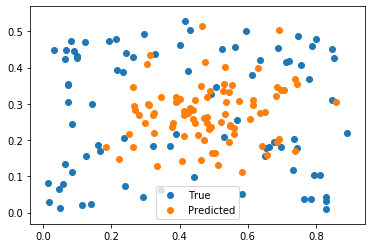

In [41]:
plt.scatter(y_test.x, y_test.z, label='True')
plt.scatter(y_pred[:,0], y_pred[:,1], label='Predicted')
plt.legend()
plt.savefig(data_dir + '_gradient_boosting_results.png')
plt.show()